Problem Statement

At Thumbtack, we strive to help customer get projects done by connecting them with the right local service providers (referred to as"pros" hereafter). And, of course, we use a lot of machine learning algorithms to achieve that goal at scale. We gathered a great deal of information from both customers and pros over time about how they interacted with each other. One particular question that we are interested in is to predict which quote will get contacted by a customer for a request(more details below). In this challenge, you will get the chance to showcase your shining machine learning skills and help us to build a predictive model forfuture requests using a (fictional) dataset.As context, here is a 10,000-foot view of the Thumbtack product. A customer comes to Thumbtack and submits a request for what he/she wants to accomplish. Based on the that request, Thumbtack matches the customer with some number of pros by sending them an invite to quote on therequest. A subset of the pros with the invitation would be interested in this request and, thus, submit a quote to the customer. The customers would receive a number of quotes (with estimated price, past reviews of the pro, profile of the pro and other information) and decide whether to contact a particular quote or not. A simple diagram might help you to understand it better (apparently, good drawing ability is not the most critical skill we are looking for). Note that we use (i), i = 1, .., 5, to denote the sequence of these events.


Each row represents a quote and the response variable to be predicted is the column 'contacted', which indicates whether the quote is contacted by the customer (1) or not (0). The goal is to build a powerful machine learning model to predict whether a future quote will be contacted by customer.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
givenData = pd.read_csv('/Users/siddharthachandra/Documents/gitRepos/thumbtack/contactedPredictor/Thumbtack_challenge.csv')
print givenData.describe()
print givenData.shape

          request_id     service_id       quote_id  has_profile_picture  \
count  107646.000000  107646.000000  107646.000000        107646.000000   
mean    21233.040930    7931.734816   53823.500000             0.981504   
std     12160.240623    4584.307559   31074.867876             0.134736   
min         1.000000       1.000000       1.000000             0.000000   
25%     10756.250000    3942.000000   26912.250000             1.000000   
50%     21240.500000    7983.500000   53823.500000             1.000000   
75%     31632.750000   11810.000000   80734.750000             1.000000   
max     42431.000000   16277.000000  107646.000000             1.000000   

       description_length     num_photos    num_reviews   num_licenses  \
count       107646.000000  107646.000000  107646.000000  107646.000000   
mean           418.838675      10.507599      36.677749       0.309449   
std            720.826076      17.030634      61.768952       0.673713   
min              0.000000   

In [3]:
#Analysis:
#price_estimate - has null values, corresponding to 'price_other'...need to equalize those...choosing 0.0  
#Response variable - data skew not present
#category - 39 unique values
# 107646 records
# unique request_ids - 42431
# unique platform - 5
#Need feature scaling for: description length, num_photos, num_reviews, price_estimate, service_distance, minutes_since_request, quote_msg_length
#Need binarization of categorical variables -> {category, platform, price_type}

print (len(np.unique(givenData['category'])),'category')
print (len(np.unique(givenData['platform'])),'platform')
print (len(np.unique(givenData['price_type'])),'price_type')
givenData

(39, 'category')
(5, 'platform')
(3, 'price_type')


request_id  service_id  quote_id  \
0                1       11025       157   
1                1        9704         1   
2                2        9179       106   
3                3        4166       385   
4                3        6462         2   
5                3        5463         7   
6                4        8023        91   
7                4        3818        35   
8                5        2465         4   
9                5        5281        51   
10               5       14377      1845   
11               6        7641       188   
12               7       14290       272   
13               7        4141       208   
14               7       12259       191   
15               8        3718         3   
16               8        9160         5   
17               8       14028         9   
18               8       10857        16   
19               8       12184       105   
20               9       11343       282   
21               9        8373        65   
22              10        3942         6   
23              10        7570         8   
24              10        1258        11   
25              11        7081        17   
26              11        2940      1194   
27              12        5534      1208   
28              12       14435        13   
29              12        8530        29   
...            ...         ...       ...   
107616       42422        3100    106890   
107617       42423        2432    106930   
107618       42424       15472    106889   
107619       42424       10546    106891   
107620       42424       10229    106908   
107621       42424        8735    106978   
107622       42424        6277    107038   
107623       42425         133    107044   
107624       42425         405    106925   
107625       42425        5264    106958   
107626       42426       16127    107265   
107627       42426       11290    106922   
107628       42426       14304    106902   
107629       42426        5933    106899   
107630       42426       11710    106896   
107631       42427       12402    106957   
107632       42428       10117    107292   
107633       42428        5172    107032   
107634       42428       12673    106920   
107635       42428        8841    107261   
107636       42428       16180    107153   
107637       42429       16233    107326   
107638       42429       15830    107020   
107639       42429        8735    106965   
107640       42429       10955    106916   
107641       42429        9535    106914   
107642       42430        3397    106954   
107643       42430       15493    107008   
107644       42431        7042    106934   
107645       42431       13676    106984   

                                     category  platform  has_profile_picture  \
0       Swimming Pool Cleaning or Maintenance     phone                    1   
1       Swimming Pool Cleaning or Maintenance     phone                    1   
2                  House Cleaning (Recurring)    native                    1   
3                             Carpet Cleaning  computer                    1   
4                             Carpet Cleaning  computer                    1   
5                             Carpet Cleaning  computer                    1   
6                            Spanish Music DJ     phone                    1   
7                            Spanish Music DJ     phone                    1   
8                  House Cleaning (Recurring)  computer                    1   
9                  House Cleaning (Recurring)  computer                    1   
10                 House Cleaning (Recurring)  computer                    1   
11                     Duct and Vent Cleaning    tablet                    1   
12               Move-in or Move-out Cleaning     phone                    1   
13               Move-in or Move-out Cleaning     phone                    1   
14               Move-in or Move-out Cleaning     phone                    1   

In [4]:
givenData_random  = givenData.reindex(np.random.permutation(givenData.index))

splitAt = int(0.2 * len(givenData_random))
test = givenData_random[0:splitAt]
cv_trainTest = givenData_random[splitAt:]

features = ['category', 'platform', 'has_profile_picture', 'description_length',
                'num_photos', 'num_reviews', 'num_licenses', 'num_websites', 'avg_rating',
                'price_type', 'price_estimate', 'service_distance', 'minutes_since_request',
                'quote_message_length']
result = ['contacted']

def processX(df, isTest):
    #if train -> filter out any outliers
    return df
    
x_raw = cv_trainTest[features]
y_raw = cv_trainTest[result]

In [5]:
xy_raw = x_raw.join(y_raw)
xy_raw.head(1) # 86117


category platform  has_profile_picture  description_length  \
15094  Wedding DJ    phone                    1                 749   

       num_photos  num_reviews  num_licenses  num_websites  avg_rating  \
15094          10           19             0             1         4.8   

        price_type  price_estimate  service_distance  minutes_since_request  \
15094  price_fixed           650.0         65.280503                    104   

       quote_message_length  contacted  
15094                   994          0

In [6]:
#chip out outliers:

#xy_raw_descLength = xy_raw[xy_raw['description_length'] < 2000]
#plt.hist(xy_raw_descLength['description_length'])
#np.max(xy_raw['description_length']) #86117
#len(xy_raw[xy_raw['description_length'] < 2000]) #83611

#np.max(xy_raw['num_photos']) #537
#len(xy_raw[xy_raw['num_photos'] < 538]) #86117
# len(xy_raw[xy_raw['num_photos'] < 110]) #85764
#len(xy_raw[xy_raw['num_photos'] < 70]) #85215
#xy_raw_num_photos = xy_raw[xy_raw['num_photos'] < 70]
#plt.hist(xy_raw_num_photos['num_photos'])

# np.max(xy_raw['num_reviews']) #474
# len(xy_raw[xy_raw['num_reviews'] < 478]) #86117
# len(xy_raw[xy_raw['num_reviews'] < 300]) #85181
# len(xy_raw[xy_raw['num_reviews'] < 200]) #83801
# xy_raw_num_reviews = xy_raw[xy_raw['num_reviews'] < 200]
# plt.hist(xy_raw_num_reviews['num_reviews'])

# np.max(xy_raw['num_licenses']) #9
# len(xy_raw[xy_raw['num_licenses'] < 4]) #85590
# len(xy_raw[xy_raw['num_licenses'] < 300]) #85181
# len(xy_raw[xy_raw['num_licenses'] < 200]) #83801
# xy_raw_num_licenses = xy_raw[xy_raw['num_licenses'] < 4]
# plt.hist(xy_raw_num_licenses['num_licenses'])

# np.max(xy_raw['price_estimate'])
# xy_raw_num_priceEstimate = xy_raw[(xy_raw['price_estimate'] < 1000) | (xy_raw['price_estimate'].isnull())] #85468
# len(xy_raw_num_priceEstimate)
# plt.hist(xy_raw_num_priceEstimate[xy_raw_num_priceEstimate['price_estimate'].notnull()]['price_estimate'])

# np.max(xy_raw['service_distance']) #2207.9762530000003
# xy_raw_num_service_distance = xy_raw[xy_raw['service_distance'] < 2208] #86117
# xy_raw_num_service_distance = xy_raw[xy_raw['service_distance'] < 150] #85900
# len(xy_raw_num_service_distance)
# plt.hist(xy_raw_num_service_distance[xy_raw_num_service_distance['service_distance'].notnull()]['service_distance'])

# np.max(xy_raw['minutes_since_request']) #4516
# xy_raw_num_minutes_since_request = xy_raw[xy_raw['minutes_since_request'] < 4517] #86117
# xy_raw_num_minutes_since_request = xy_raw[xy_raw['minutes_since_request'] < 2200] #85080
# len(xy_raw_num_minutes_since_request)
# plt.hist(xy_raw_num_minutes_since_request[xy_raw_num_minutes_since_request['minutes_since_request'].notnull()]['minutes_since_request'])

# np.max(xy_raw['quote_message_length']) #12159
# xy_raw_quote_message_length = xy_raw[xy_raw['quote_message_length'] < 12160] #86117
# xy_raw_quote_message_length = xy_raw[xy_raw['quote_message_length'] < 2000] #85786
# len(xy_raw_quote_message_length)
# plt.hist(xy_raw_quote_message_length[xy_raw_quote_message_length['quote_message_length'].notnull()]['quote_message_length'])


#1. descrtiption_length < 2000
#2. num_photos < 70
#3. num_reviews < 200
#4. num_licenses < 4 or not
#5. price_estimate < 1000
#6. service_distance < 150
#7. minutes_since_request < 2200
#8. quote_message_length < 2000
#9. num_websites, avg_Rating - no change

def massage(df):
    df_f = df.fillna(0)
    return df_f[(df_f['description_length'] < 2000) & 
         (df_f['num_photos'] < 70) &
         (df_f['num_reviews'] < 200) &
         (df_f['num_licenses'] < 4) &
         (df_f['price_estimate'] < 1000) &
         (df_f['service_distance'] < 150) &
         (df_f['minutes_since_request'] < 2200) &
         (df_f['quote_message_length'] < 2000)]

xy_massaged = massage(xy_raw)
len(xy_massaged) #78647 (91% of original data)
xy_massaged[features]

category  platform  has_profile_picture  \
15094                        Wedding DJ     phone                    1   
32950      Move-in or Move-out Cleaning    tablet                    1   
86670      Move-in or Move-out Cleaning    tablet                    1   
99381         House Cleaning (One Time)     phone                    0   
107513     Move-in or Move-out Cleaning     phone                    0   
51754           Deep or Spring Cleaning  computer                    1   
25360                   Carpet Cleaning     phone                    1   
47815               Commercial Cleaning  computer                    1   
20296                   Window Cleaning     phone                    1   
99737                          Event DJ     phone                    1   
66124                       Sweet 16 DJ  computer                    1   
35992         House Cleaning (One Time)  computer                    1   
588        Move-in or Move-out Cleaning     phone                    1   
91430        House Cleaning (Recurring)  computer                    1   
20353      Move-in or Move-out Cleaning  computer                    1   
44011         House Cleaning (One Time)    native                    1   
86970   Gutter Cleaning and Maintenance  computer                    1   
83450                          Event DJ  computer                    1   
46596        House Cleaning (Recurring)     other                    1   
34034         House Cleaning (One Time)  computer                    1   
1542            Deep or Spring Cleaning    native                    1   
18251                   Carpet Cleaning  computer                    1   
30853        House Cleaning (Recurring)     phone                    1   
90761                   Window Cleaning     phone                    1   
3639                    Window Cleaning     phone                    1   
85205           Deep or Spring Cleaning    tablet                    1   
85092   Gutter Cleaning and Maintenance  computer                    1   
97528                Apartment Cleaning    tablet                    1   
4436                 Apartment Cleaning     phone                    1   
9068                    Carpet Cleaning    tablet                    1   
...                                 ...       ...                  ...   
21714         House Cleaning (One Time)     phone                    1   
14183        House Cleaning (Recurring)    native                    1   
17264         House Cleaning (One Time)  computer                    1   
4667         House Cleaning (Recurring)    native                    1   
28095                          Event DJ     phone                    1   
32535                Apartment Cleaning     phone                    1   
3318                    Window Cleaning  computer                    1   
47561        House Cleaning (Recurring)  computer                    1   
80139        House Cleaning (Recurring)     phone                    1   
94284      Move-in or Move-out Cleaning  computer                    1   
62479      Move-in or Move-out Cleaning    tablet                    1   
93404        House Cleaning (Recurring)    native                    1   
24203         House Cleaning (One Time)     phone                    1   
47277                          Event DJ  computer                    1   
5430          House Cleaning (One Time)  computer                    1   
64607                   Carpet Cleaning  computer                    1   
76254                   Carpet Cleaning  computer                    1   
14044         House Cleaning (One Time)     phone                    1   
38245                          Event DJ     phone                    1   
93234                          Event DJ     phone                    1   
74981      Move-in or Move-out Cleaning    tablet                    1   
92513                   Carpet Cleaning     phone                    1   
29931      Move-in or Move-out Clea

In [7]:
#global-variables
maxim = {}; minim = {}; mean = {}; 
category = {}; platform = {}; price_type = {}

In [8]:
categorical = ['category', 'platform', 'price_type']
numerical = ['has_profile_picture', 
             'description_length', 
             'num_photos', 'num_reviews', 'num_licenses',
             'num_websites', 'avg_rating', 'price_estimate',
             'service_distance', 'minutes_since_request', 'quote_message_length']

def normalize(df, isTest = False):
    global minim, maxim, mean
    for c in numerical:
        if(not isTest):
            maxim[c] = df[c].max()
            minim[c] = df[c].min()
            mean[c] = df[c].mean()
        df[c] = (df[c] - mean[c]) / (maxim[c] + minim[c])
    return df   


def cat2num(df, isTest = False):
    global category, platform, price_type
    if (not isTest):
        category = {k for k in df['category'].values}
        platform = {k for k in df['platform'].values}
        price_type = {k for k in df['price_type'].values}
        res_df = pd.get_dummies(df, columns = categorical)
    else:
        category_test = set(df['category'].values)
        platform_test = set(df['platform'].values)
        price_type_test = set(df['price_type'].values)
        
        tstOnly_category = category_test - category
        trainOnly_category = category - category_test
        tstOnly_platform = platform_test - platform
        trainOnly_platform = platform - platform_test
        tstOnly_price_type = price_type_test - price_type
        trainOnly_price_type = price_type - price_type_test
        
        res_df = pd.get_dummies(df, columns = categorical)
        for n in trainOnly_category:
            res_df['category_'+ n] = 0
        for n in tstOnly_category:
            res_df = res_df.drop('category_'+n , axis = 1)

        for n in trainOnly_platform:
            res_df['platform_'+ n] = 0
        for n in tstOnly_platform:
            res_df = res_df.drop('platform_'+n , axis = 1)

        for n in trainOnly_price_type:
            res_df['price_type_'+ n] = 0
        for n in tstOnly_price_type:
            res_df = res_df.drop('price_type_'+n , axis = 1)
            
    return res_df

            
xy_normalized = normalize(xy_massaged)
xy_final = cat2num(xy_normalized)
xy_analysis = xy_final
xy_analysis.head(1)

has_profile_picture  description_length  num_photos  num_reviews  \
15094             0.019913            0.212757    0.013549    -0.045775   

       num_licenses  num_websites  avg_rating  price_estimate  \
15094     -0.088307      0.060265     0.15236        0.485448   

       service_distance  minutes_since_request           ...            \
15094          0.323101              -0.049779           ...             

       category_Window Blinds Cleaning  category_Window Cleaning  \
15094                                0                         0   

       platform_computer  platform_native  platform_other  platform_phone  \
15094                  0                0               0               1   

       platform_tablet  price_type_price_fixed  price_type_price_hourly  \
15094                0                       1                        0   

       price_type_price_other  
15094                       0  

[1 rows x 59 columns]

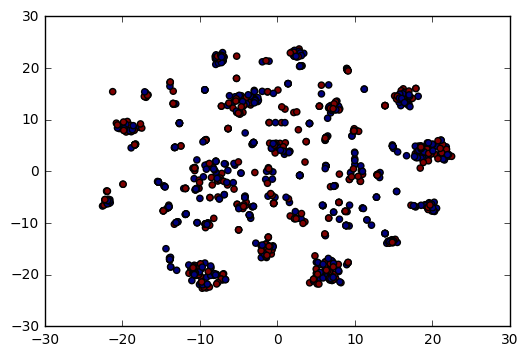

In [10]:
#5. TSNE visualization
from sklearn.manifold import TSNE
tr = xy_analysis.head(1000)
y = tr[result]
cols = tr.columns.drop(['contacted'])
x = tr[cols]
X_tsne = TSNE().fit_transform(x)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = y)

In [11]:
#next steps: 
#I Visualization
#1. parallel coordinates
#2. Andrew curves
#3. scatter_matrix

#II Train models


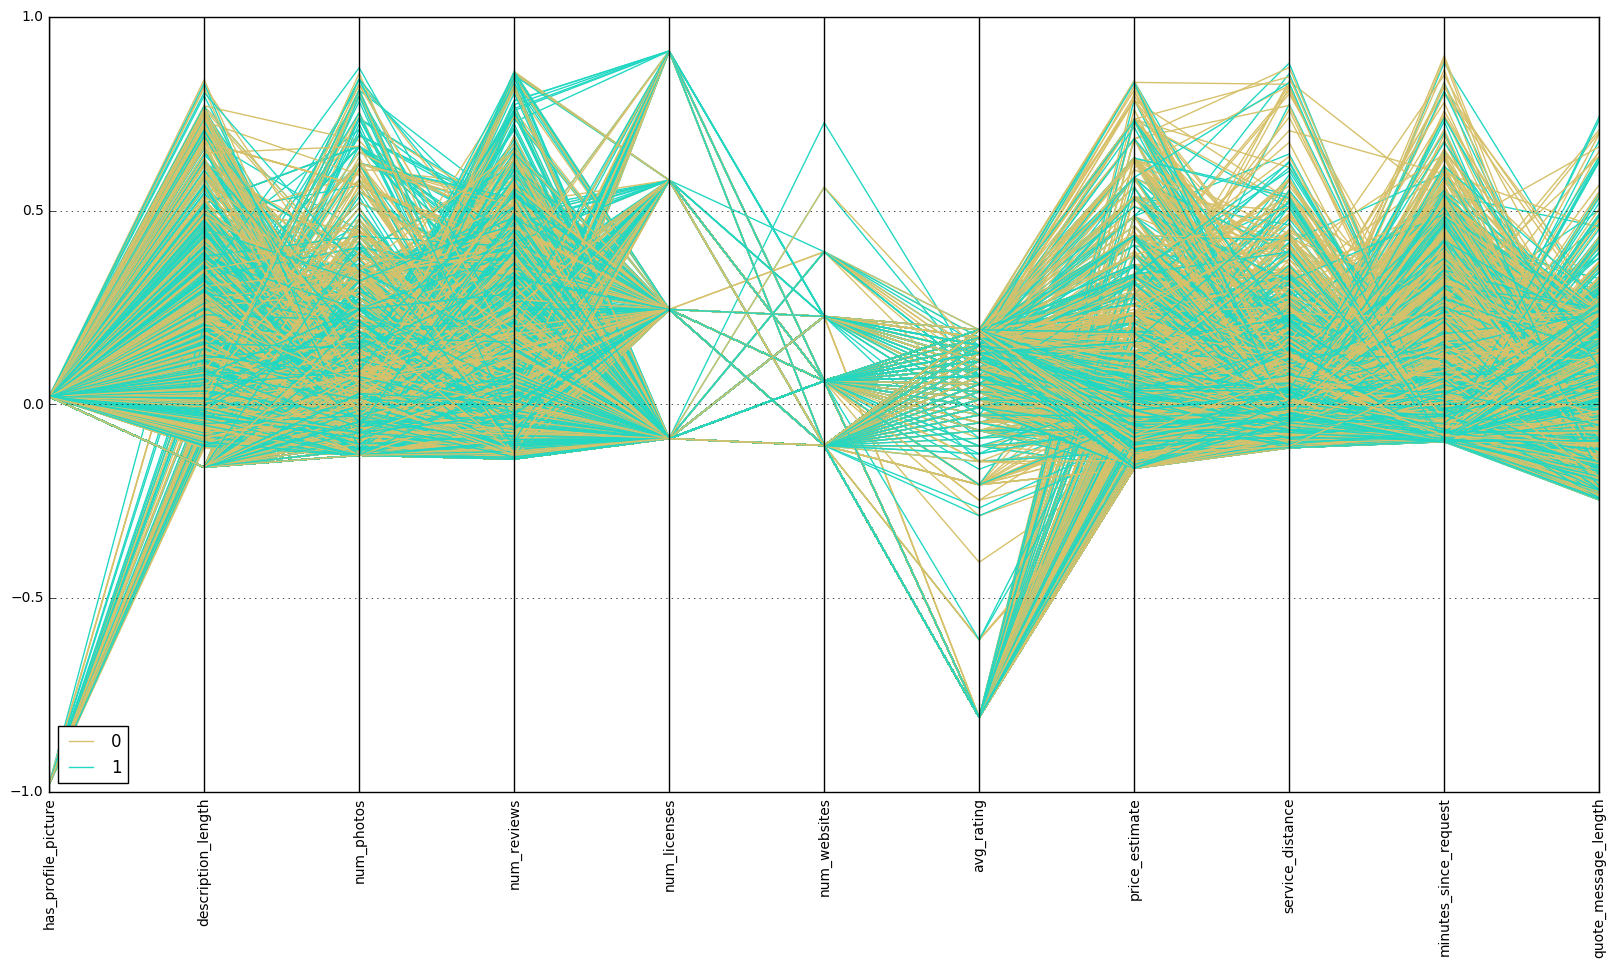

In [12]:
#parallel coordinates
from pandas.tools.plotting import parallel_coordinates
tr = xy_analysis.head(5000)
plt.figure(figsize=(20,10))
plt.xticks(rotation = 'vertical')
parallel_coordinates(tr[numerical + ['contacted']], 'contacted')
plt.legend(loc = 'lower left')
plt.show()

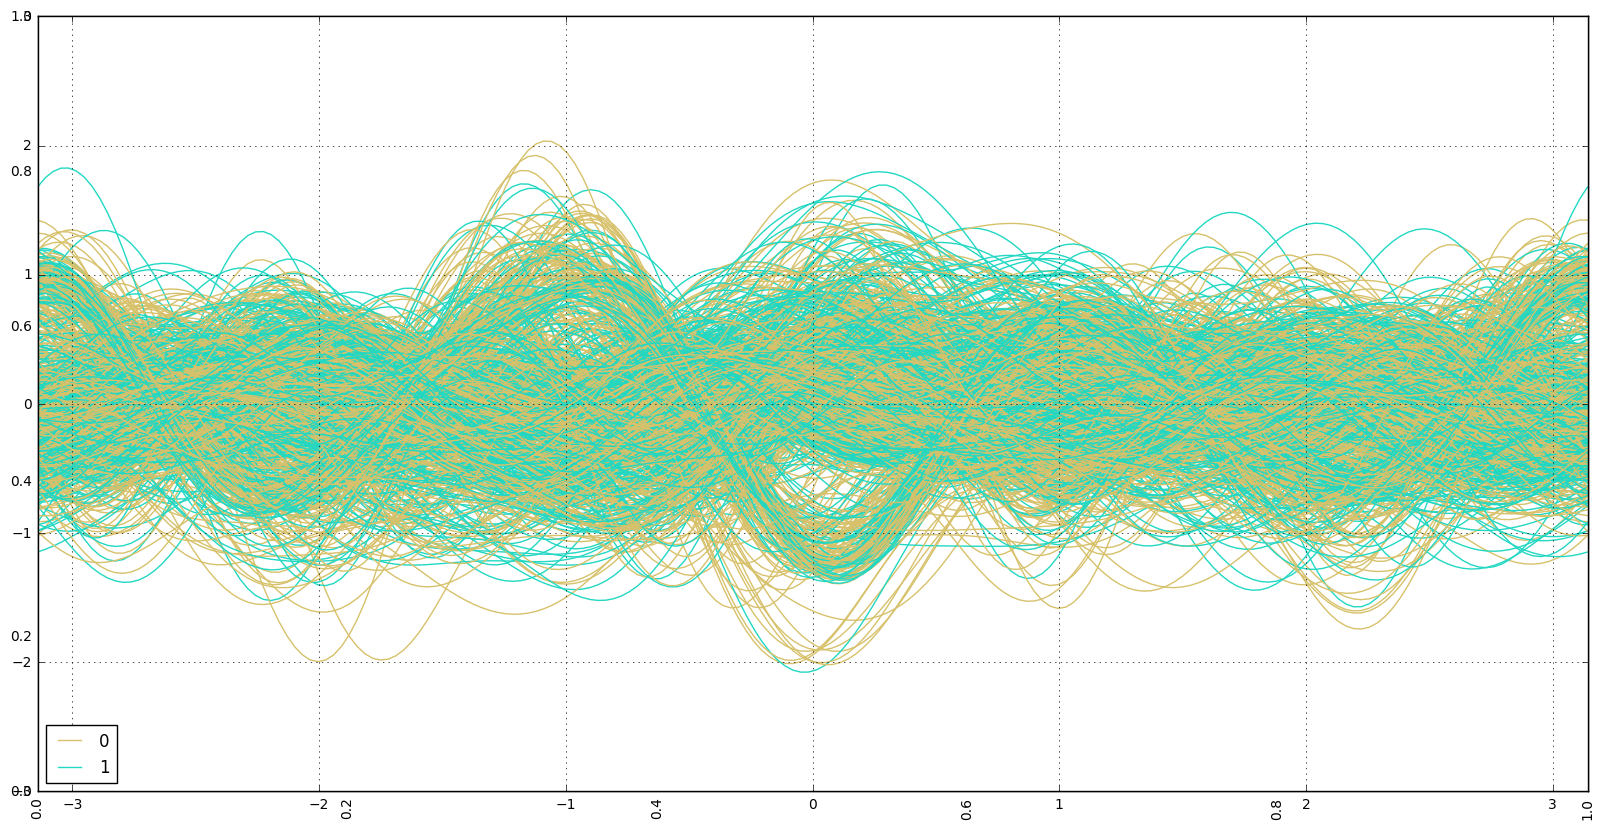

In [13]:
#Andrews curves
from pandas.tools.plotting import andrews_curves
tr = xy_analysis.head(1000)
plt.figure(figsize=(20,10))
plt.xticks(rotation = 'vertical')
andrews_curves(tr[numerical + ['contacted']], 'contacted')
plt.legend(loc = 'lower left')
plt.show()

In [14]:
tr.head(1)

has_profile_picture  description_length  num_photos  num_reviews  \
15094             0.019913            0.212757    0.013549    -0.045775   

       num_licenses  num_websites  avg_rating  price_estimate  \
15094     -0.088307      0.060265     0.15236        0.485448   

       service_distance  minutes_since_request           ...            \
15094          0.323101              -0.049779           ...             

       category_Window Blinds Cleaning  category_Window Cleaning  \
15094                                0                         0   

       platform_computer  platform_native  platform_other  platform_phone  \
15094                  0                0               0               1   

       platform_tablet  price_type_price_fixed  price_type_price_hourly  \
15094                0                       1                        0   

       price_type_price_other  
15094                       0  

[1 rows x 59 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d260690>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x114fac1d0>]], dtype=object)

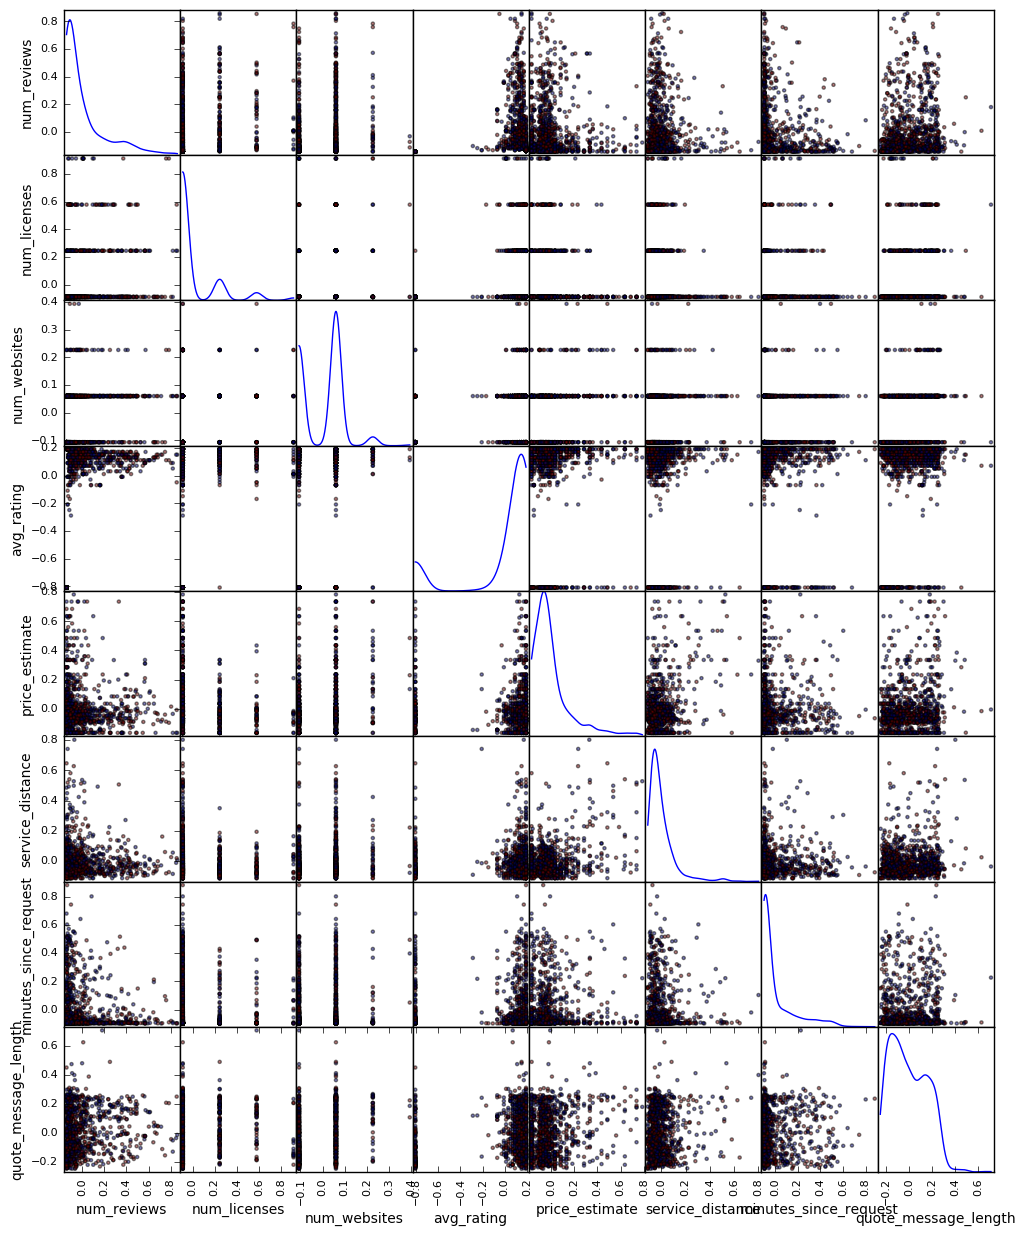

In [15]:
from pandas.tools.plotting import scatter_matrix
colors = ['red', 'blue']
tr = xy_analysis.head(1000)[numerical + ['contacted']]
df_for_Scatter = tr.drop(['has_profile_picture','description_length', 'num_photos'], axis=1)
scatter_matrix(df_for_Scatter.drop('contacted', axis =1), figsize = [12, 15], c=tr.contacted, diagonal = 'kde')

In [ ]:
#Steps
#1. import various classifier models that need to be tried out
#2. Do 5-fold cross validation on the CV set and get the top 5 performing models
#3. For each fold in the CV, use grid search for selecting the best parameters intially

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Logistic Regression
lr = LogisticRegression(penalty='l2', random_state = 10, C = 599)
Cs = np.logspace(-5, 5, 10)
clf_logisticRegression = GridSearchCV(estimator = lr, 
                                      param_grid = dict(),
#                                       param_grid = dict(C= Cs),
                                      n_jobs = -1)

clf_svmLinear = SVC(C=1.0, kernel = 'linear', probability=True)
clf_svmPoly = SVC(C=1.0, degree = 5, kernel = 'poly', probability=True)
clf_svmRbf = SVC(C=1.0, gamma = 1.0)

num_trees = range(50, 700, 150); n_feats = range(4,11,2); max_depths = range(1,7); learn_rates = np.logspace(-5,1,10)
#RF
rf = RandomForestClassifier(n_estimators=100, max_features=9)
clf_randomForest = GridSearchCV(estimator = rf, 
                                param_grid = dict(),
                                #param_grid = dict(n_estimators = num_trees, max_feature = n_feats),
                                n_jobs = -1)

extraTrees = ExtraTreesClassifier(n_estimators = 550, max_features = 9)
clf_extraTrees = GridSearchCV(estimator = extraTrees, 
                                param_grid = dict(),
                                #param_grid = dict(n_estimators = [100, 250, 400, 550, 650, 600], max_features = range(1,10,2)),
                                n_jobs = -1)

ada_boost = AdaBoostClassifier(n_estimators = 650, learning_rate = 0.1)
clf_adaBoost = GridSearchCV(estimator = ada_boost, 
                                #param_grid = dict(n_estimators = [100, 250, 400, 550, 650, 600], learning_rate = learn_rates),
                                param_grid = dict(),
                                n_jobs = -1)
#clf_adaBoost = AdaBoostClassifier(n_estimators=100)

gb = GradientBoostingClassifier(max_depth = 3)#,
#                                 n_estimators = 400,
#                                 max_features = 8,
#                                 learning_rate = 0.1)
clf_gb = GridSearchCV(estimator = gb, 
#                       param_grid = dict(), 
                      param_grid = dict(n_estimators = num_trees, max_features = n_feats, learning_rate = learn_rates), 
                      n_jobs = -1)

#clf_xgb = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)

clfs = [clf_gb]
clf_names = ['gbm']

# clfs = [clf_logisticRegression, clf_randomForest, clf_extraTrees, clf_adaBoost, clf_gb]
# clf_names = ['LR','random_forest', 'extra_trees', 'ada_boost', 'gbm']

X_Y = cv_trainTest.head(5000)

In [ ]:
from sklearn.metrics import accuracy_score

kf = KFold(n_splits=5, shuffle = True)
kf.get_n_splits(X_Y)
max = 0
scores = []

def process(df, isTest = False):
    init = df[df['price_estimate'] > 0]

    if (not isTest):
        m = massage(init)
        n = normalize(m)
        res = cat2num(n)
    else:
        n = normalize(init, True)
        res = cat2num(n, True)
        
    return res.drop(['contacted', 'request_id', 'service_id', 'quote_id'], axis=1), res[result]    

def getSortKey(item):
    return item[0]

for idx in range(0,len(clfs)):
    #implement cross-validation    
    cv_scores = []
    for train_index, test_index in kf.split(X_Y):
        X_train, Y_train = process(X_Y.iloc[train_index])
        X_test, Y_test = process(X_Y.iloc[test_index], True)
        clf = clfs[idx].fit(X_train.values, Y_train.values.ravel())
        print 'best params %s' %(clf.best_params_)
        score = clf.score(X_test.values, Y_test.values.ravel())
        cv_scores.append(score)
        
    scores.append(np.mean(cv_scores))

clf_composite = zip(scores, clfs, clf_names)    
clf_composite_sorted = sorted(clf_composite, key = getSortKey, reverse=True)
clfs_top5 = clf_composite_sorted[0:5]
print(clfs_top5[0][0],clfs_top5[0][2])

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
cv_scores

[0.5,
 0.51396648044692739,
 0.57777777777777772,
 0.51933701657458564,
 0.58823529411764708]

In [6]:
#Analysis -> 'Contacted/not contacted' by various categories
Y1_category = givenData[(givenData['contacted'] ==1)].groupby(['minutes_since_request'])['contacted'].count()
Y0_category = givenData[(givenData['contacted'] ==0)].groupby(['minutes_since_request'])['contacted'].count()
#.groups.keys()
cats_1 = Y1_category.sort_values(ascending = False)
cats_0 = Y0_category.sort_values(ascending = False)

print (cats_1)
print (cats_0)

minutes_since_request
2       2588
3       2255
4       1928
1       1763
5       1638
6       1391
7       1281
8       1153
9        937
10       894
11       858
12       757
13       694
14       646
15       579
16       529
17       518
18       480
19       475
20       411
22       409
21       381
23       372
26       338
24       327
28       317
25       316
27       292
30       271
29       258
        ... 
2207       1
2213       1
2087       1
2217       1
2225       1
2233       1
2234       1
2240       1
2255       1
2258       1
2163       1
2157       1
2155       1
2152       1
2088       1
2089       1
2090       1
2091       1
2093       1
2111       1
2117       1
2118       1
2121       1
2124       1
2132       1
2136       1
2137       1
2140       1
2141       1
4490       1
Name: contacted, dtype: int64
minutes_since_request
2       2217
3       2007
4       1828
5       1514
6       1418
1       1389
7       1253
8       1078
9        938
10       928
11 

In [9]:
#Randomize dataset and do a 60-20-20 split before any processing
df_randomized = givenData

#taking care of Nan values here / also try remvoing them completely
#df_randomized = df_randomized.fillna(0.0)
df_randomized = df_randomized[~df_randomized['price_estimate'].isnull()]

df_randomized = df_randomized.reindex(np.random.permutation(df_randomized.index))

In [18]:
#Convert category variable to discrete values
from sklearn import preprocessing

le_category = preprocessing.LabelEncoder()

#to convert into numbers
df_randomized['categoryNumber'] = le_category.fit_transform(df_randomized.category)

#adding feature that gives us th product of rating and number of reviews
df_randomized['ratingComposite'] = df_randomized.avg_rating * df_randomized.num_reviews

df_randomized
#to convert back
#df_randomized.cat = le_category.inverse_transform(df_randomized.category)

request_id  service_id  quote_id  \
103397       40712       15903    103394   
107438       42350       10035    107552   
101526       39952        7368    101154   
13469         5354       14436     13261   
11256         4484       10909     10925   
103266       40665        3403    103464   
102596       40390       10468    102189   
104822       41297        4477    107628   
55634        21975        5978     54868   
86115        33803       11852     85464   
83072        32572        2413     82346   
55294        21839        8256     54854   
98212        38592        1532     97758   
43087        17098       12204     43001   
87729        34443        6326     87085   
79450        31128       15036     78976   
100645       39581        9156    100261   
2152           884       14094      3971   
52494        20725        8059     52053   
2984          1212        3739      2538   
76920        30169        6679     78710   
5283          2159        5463      4830   
52817        20842        9159     52299   
29771        11919       14733     29062   
85624        33620       15573     84961   
58889        23266        7486     58201   
30481        12223         964     29779   
59463        23491        3988     62137   
66058        26044        4082     65785   
42910        17037       10028     42453   
...            ...         ...       ...   
87578        34382        6452     86911   
23452         9415       14056     22961   
37556        14968       11659     36967   
75688        29683       15659     75688   
49187        19446       11820     49158   
44645        17674        6878     46344   
4249          1735         180      3737   
50105        19798        3719     49644   
50805        20074       12832     51148   
54239        21413        4329     53582   
87525        34359       13784     89622   
60446        23880       13878     59788   
101235       39832       13422    101979   
106236       41860        9764    107007   
11611         4615        3672     10985   
22464         9011       14763     25685   
55571        21949       15056     58523   
31210        12509       13145     30639   
8081          3291       11443      7743   
11061         4412        3110     10542   
73937        29006        8530     73473   
63914        25230        1267     63357   
16099         6412       14673     15710   
81054        31752       10638     82292   
4195          1714        9496      7367   
74074        29060        9819     73606   
28753        11496         674     27989   
51335        20279        3157     51519   
7393          3010        5463      7030   
68324        26887        8877     67797   

                                     category  platform  has_profile_picture  \
103397              House Cleaning (One Time)  computer                    1   
107438              House Cleaning (One Time)     phone                    1   
101526                     Apartment Cleaning  computer                    1   
13469              House Cleaning (Recurring)  computer                    1   
11256                     Commercial Cleaning  computer                    1   
103266             House Cleaning (Recurring)  computer                    0   
102596                        Carpet Cleaning    native                    1   
104822              House Cleaning (One Time)  computer                    1   
55634                                Event DJ     phone                    1   
86115                         Carpet Cleaning  computer                    1   
83072                         Carpet Cleaning  computer                    1   
55294         Gutter Cleaning and Maintenance     phone                    1   
98212                         Carpet Cleaning     phone                    1   
43087                         Carpet Cleaning     other                    1   
87729                      Apartment Cleaning  computer                    1   

In [42]:
#plot analysis of data:
#Based on scatter plot analysis, it seems like there is no clear trend observed for splitting the data into the 2 output categories
%matplotlib
jet=plt.get_cmap('coolwarm')
relevant = ['ratingComposite', 'categoryNumber', 'price_type', 'avg_rating', 'num_websites', 'price_estimate', 'quote_message_length', 'service_distance', 'has_profile_picture', 'num_reviews', 'num_licenses','num_photos', 'platform','category','description_length', 'minutes_since_request', 'contacted']
df_reduced = df_randomized[relevant]
x = df_reduced['categoryNumber']
y = df_reduced['price_estimate']
z = df_reduced['contacted']
labels = [0,1]

plt.xlabel('categoryNumber')
plt.ylabel('price_estimate')
plt.scatter(x, y, s=100, c=z, cmap=jet)

cb=plt.colorbar(ticks=np.array(labels))
cb.set_ticklabels(labels)

Using matplotlib backend: MacOSX


In [43]:
# training set -> set to be used for training the model
# test set -> to be removed. This set would be used to calculate final performance of the classifier
# validation set -> would be used for selecting model family
splitAt = int(0.2 * len(df_reduced))

test = df_reduced[0:splitAt]
cv_trainTest = df_reduced[splitAt:]
cv_test = cv_trainTest[0:splitAt]
cv_train = cv_trainTest[splitAt:]

In [44]:
#   3 stages to preprocess training set:
#1. fillNA for Price_estimate(done already)
#2. Normalize and scale values of x
#3. Binarize categorical variables
len(cv_trainTest)

77737

In [54]:
#model selection
from sklearn.cross_validation import KFold
# from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

output = [u'contacted']
categoricalVariables = ['category', 'platform', 'price_type']
numericalFeatures = ['ratingComposite', 'description_length','num_photos', 'num_reviews', 'num_licenses','num_websites','avg_rating', 'price_estimate', 'service_distance', 'minutes_since_request', 'quote_message_length']
features = numericalFeatures + categoricalVariables

cv_trainTestSmall = cv_trainTest[0:5000]

clf_logisticRegression = LogisticRegression(penalty='l2', C=0.00000001,random_state = 10)   #logistic regression 0.01, 0.1 --54.355
clf_svmLinear = SVC(C=0.01, kernel = 'linear', probability=True)
clf_svmPoly = SVC(C=1.0, degree = 5, kernel = 'poly', probability=True)
#clf_svmRbf = SVC(C=1.0, gamma = 1.0)
clf_randomForest = RandomForestClassifier(n_estimators=100, n_jobs=2)

#clfs = [clf_logisticRegression]
clfs = [clf_logisticRegression, clf_svmLinear, clf_svmPoly, clf_randomForest]

Y = cv_trainTestSmall[output]
X = cv_trainTestSmall[features]

kf = KFold(len(Y), n_folds=5)
max = 0
scores = []

for idx in range(0,len(clfs)):
    #implement cross-validation
    cv_scores = []
    for train_index, test_index in kf:
        #pre-process train
        X_trainRaw = cv_trainTestSmall.iloc[train_index]
                    
        #1. Normalize and scale values of x
        for n in numericalFeatures:  
            X_trainRaw.loc[:, n] = (X_trainRaw[n] - X_trainRaw[n].mean()) / (X_trainRaw[n].max() - X_trainRaw[n].min())
        
        #2. Binarize categorical variables
        X_trainProcessed = X_trainRaw
        for c in categoricalVariables:
            X_trainProcessed.loc[:,c] = X_trainProcessed[c].astype('category')
                
        X_trainProcessed = pd.get_dummies(X_trainProcessed)
        categoryFeaturesTrain = X_trainProcessed.columns.difference(X_trainRaw.columns)
        features = categoryFeaturesTrain.union(numericalFeatures)    
        X_train = X_trainProcessed[features].values
        
        #pre-process test
        X_testRaw = cv_trainTestSmall.iloc[test_index]
        
        #1. Normalize and scale values of x
        for n in numericalFeatures:  
            X_testRaw.loc[:, n] = (X_testRaw[n] - X_trainRaw[n].mean()) / (X_trainRaw[n].max() - X_trainRaw[n].min())
    
        #2. Binarize categorical variables
        X_testProcessed = X_testRaw
        for c in categoricalVariables:
            X_testProcessed.loc[:,c] = X_testProcessed[c].astype('category')

        X_testProcessed = pd.get_dummies(X_testProcessed)
        diff = categoryFeaturesTrain.difference(X_testProcessed.columns)
        
        #This adds binarized_categorical columns with 0.0 for all binarized_categorical variables that are absent in test set but present in training set
        for k in diff:
            if (k not in X_testProcessed.columns):
                X_testProcessed[k] = 0.0
                
        X_test = X_testProcessed[features].values
        Y_train, Y_test = Y.iloc[train_index].values.ravel(), Y.iloc[test_index].values.ravel()      
        
        clf = clfs[idx].fit(X_train, Y_train)
        score = clf.score(X_test, Y_test)
        cv_scores.append(score)
    scores.append(np.mean(cv_scores))

print(scores)
highScoreIndex = np.argmax(scores)
print(highScoreIndex)
clf = clfs[highScoreIndex]

[0.55080000000000007, 0.5454, 0.48499999999999999, 0.52539999999999998]
0


In [55]:
#Use training+validation set to train the model

X_trainRaw = cv_trainTestSmall
Y_trainRaw = cv_trainTestSmall[output]
Y_testRaw = test[output]

#pre-process train
#1. Normalize and scale values of x
for n in numericalFeatures:  
    X_trainRaw.loc[:, n] = (X_trainRaw[n] - X_trainRaw[n].mean()) / (X_trainRaw[n].max() - X_trainRaw[n].min())

#2. Binarize categorical variables
X_trainProcessed = X_trainRaw
for c in categoricalVariables:
    X_trainProcessed.loc[:,c] = X_trainProcessed[c].astype('category')
                
X_trainProcessed = pd.get_dummies(X_trainProcessed)
categoryFeaturesTrain = X_trainProcessed.columns.difference(X_trainRaw.columns)
features = categoryFeaturesTrain.union(numericalFeatures)    
X_train = X_trainProcessed[features].values    



#pre-process test
X_testRaw = test
        
#1. Normalize and scale values of x
for n in numericalFeatures:  
    X_testRaw.loc[:, n] = (X_testRaw[n] - X_trainRaw[n].mean()) / (X_trainRaw[n].max() - X_trainRaw[n].min())
    
#2. Binarize categorical variables
X_testProcessed = X_testRaw
for c in categoricalVariables:
    X_testProcessed.loc[:,c] = X_testProcessed[c].astype('category')

X_testProcessed = pd.get_dummies(X_testProcessed)
diff = categoryFeaturesTrain.difference(X_testProcessed.columns)

#This adds binarized_categorical columns with 0.0 for all binarized_categorical variables that are absent in test set but present in training set
for k in diff:
    if (k not in X_testProcessed.columns):
        X_testProcessed[k] = 0.0

X_test = X_testProcessed[features].values

Y_train, Y_test = Y_trainRaw.values.ravel(), Y_testRaw.values.ravel()      

In [56]:
#get performance on test set
model = clf.fit(X_train, Y_train)
predictions = model.predict(X_test)
model.score(X_test, Y_test)

0.54039312545024187

In [57]:
#performance metrics of classifier
from sklearn import metrics

print(metrics.classification_report(Y_test, predictions))
print(metrics.confusion_matrix(Y_test, predictions))

             precision    recall  f1-score   support

          0       0.59      0.46      0.52     10344
          1       0.51      0.63      0.56      9090

avg / total       0.55      0.54      0.54     19434

[[4758 5586]
 [3346 5744]]


In [60]:
#Source: http://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 


#plot ROC
from sklearn.metrics import roc_curve, auc

actual = Y_test
allPredictions = model.predict_proba(X_test)
predictions = [i[0] for i in allPredictions]

false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

# determine optimal threshold
optimalThreshold = Find_Optimal_Cutoff(actual, predictions)

plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#AUC < 0.5 indicates a failed classifier

In [61]:
X_testProcessed[features].columns

Index([u'avg_rating', u'category_Apartment Cleaning',
       u'category_Bar or Bat Mitzvah DJ',
       u'category_Basement or Attic Cleaning', u'category_Carpet Cleaning',
       u'category_Chimney Cleaning', u'category_Cleaning Out',
       u'category_Commercial Cleaning', u'category_Deep or Spring Cleaning',
       u'category_Dryer Vent Cleaning', u'category_Duct and Vent Cleaning',
       u'category_EDM or House Music DJ', u'category_Event DJ',
       u'category_Fireplace and Chimney Cleaning', u'category_Floor Cleaning',
       u'category_Garage Cleaning',
       u'category_Gutter Cleaning and Maintenance',
       u'category_House Cleaning (One Time)',
       u'category_House Cleaning (Recurring)', u'category_Mattress Cleaning',
       u'category_Move-in or Move-out Cleaning',
       u'category_Office Cleaning (One Time)',
       u'category_Office Cleaning (Recurring)',
       u'category_Outdoor or Balcony Cleaning', u'category_Quinceanera DJ',
       u'category_Roof Cleaning', u'c

In [68]:
#show perf wrt category, platform and priceType
#Get performance figures on the test Set for different categories:

#A. Total number of records in test set

#B. Price_type:
    #a. price_type_price_fixed
    #b. price_type_price_hourly
    
#C. Platform:
    #a. platform_other
    #b. platform_computer
    #c. platform_native
    #d. platform_phone
    #e. platform_tablet
        
#D. categories: (skipping for now)
    
totalCount = len(Y_test)
X_testProcessed[features]
# platform_other_count = [k for k in X_testProcessed[features]]
# platform_other_count

# anyBrandCount = len([k for k in X_testProcessed[features] if k!='not_an_ad' and k!= 'no prediction'])
# anyBrandCountPerc = float(anyBrandCount)/totalCount
# noAdCount = len([k for k in Y_test if k=='not_an_ad'])
# noAdCountPerc = float(noAdCount)/totalCount

# #number of surrenders by the classifier
# noPredictionCount = len([k for k in predictions if k=='no prediction'])
# noPredictionCountPerc = float(noPredictionCount)/totalCount

# # %correctly Predicted, %incorrectlyredicted, %surrendered
# anyBrandCorrect = 0
# not_an_adCorrect = 0
# not_an_adSurrender = 0
# anyBrandSurrender = 0
# not_an_adIncorrect = 0
# anyBrand_notAnAdIncorrect = 0
# anyBrand_wrongBrandIncorrect = 0

# for idx,k in enumerate(Y_test):
#     if(k == predictions[idx]):
#         if (k=='not_an_ad'):
#             not_an_adCorrect += 1    
#         else:
#             anyBrandCorrect += 1
#     elif(predictions[idx] == 'no prediction'):
#         if (k=='not_an_ad'):
#             not_an_adSurrender += 1
#         else:
#             anyBrandSurrender += 1
#     else:
#         if (k=='not_an_ad'):
#             not_an_adIncorrect += 1
#         else:
#             if (predictions[idx] == 'not_an_ad'):
#                 anyBrand_notAnAdIncorrect += 1
#             else:
#                 anyBrand_wrongBrandIncorrect += 1
                

avg_rating  category_Apartment Cleaning  \
103397  5.000000e+00                          0.0   
107438  5.000000e+00                          0.0   
101526  4.800000e+00                          1.0   
13469   1.796785e-16                          0.0   
11256   5.000000e+00                          0.0   
103266  1.796785e-16                          0.0   
102596  4.800000e+00                          0.0   
104822  4.700000e+00                          0.0   
55634   5.000000e+00                          0.0   
86115   4.900000e+00                          0.0   
83072   4.200000e+00                          0.0   
55294   4.800000e+00                          0.0   
98212   4.700000e+00                          0.0   
43087   4.900000e+00                          0.0   
87729   4.600000e+00                          1.0   
79450   1.796785e-16                          0.0   
100645  4.700000e+00                          0.0   
2152    1.796785e-16                          0.0   
52494   4.900000e+00                          0.0   
2984    1.796785e-16                          0.0   
76920   4.800000e+00                          1.0   
5283    4.500000e+00                          0.0   
52817   4.900000e+00                          0.0   
29771   1.796785e-16                          0.0   
85624   1.796785e-16                          0.0   
58889   4.600000e+00                          0.0   
30481   4.800000e+00                          0.0   
59463   4.900000e+00                          0.0   
66058   4.700000e+00                          0.0   
42910   5.000000e+00                          0.0   
...              ...                          ...   
2399    4.700000e+00                          0.0   
6246    5.000000e+00                          0.0   
16763   4.500000e+00                          0.0   
27132   1.796785e-16                          0.0   
95097   5.000000e+00                          0.0   
100739  4.600000e+00                          1.0   
58572   4.800000e+00                          0.0   
96342   5.000000e+00                          0.0   
96452   4.800000e+00                          0.0   
22909   4.000000e+00                          0.0   
62480   4.800000e+00                          0.0   
37126   4.800000e+00                          0.0   
24492   4.600000e+00                          0.0   
71709   4.900000e+00                          0.0   
24506   4.600000e+00                          0.0   
30839   5.000000e+00                          0.0   
105513  4.400000e+00                          0.0   
32212   1.796785e-16                          0.0   
41836   4.300000e+00                          0.0   
21494   4.800000e+00                          0.0   
57181   4.700000e+00                          0.0   
16534   1.796785e-16                          0.0   
98691   4.800000e+00                          0.0   
65152   4.600000e+00                          0.0   
107374  4.200000e+00                          0.0   
1510    5.000000e+00                          0.0   
22136   5.000000e+00                          0.0   
38420   4.800000e+00                          0.0   
49881   4.600000e+00                          0.0   
24097   4.800000e+00                          0.0   

        category_Bar or Bat Mitzvah DJ  category_Basement or Attic Cleaning  \
103397                             0.0                                  0.0   
107438                             0.0                                  0.0   
101526                             0.0                                  0.0   
13469                              0.0                                  0.0   
11256                              0.0                                  0.0   
103266                             0.0                                  0.0   
102596                             0.0                                  0.0   
104822                             0.0                                  0.0   
55634       